In [ ]:
import random
import numpy as np
# random.uniform(a, b) : a부터b까지 의 값으로 일정한 확률로

In [ ]:
random.uniform(1, 10)

7.644237002050966

In [ ]:
class SlotMachine:
  def __init__(self, p):
    self.p = p

    # 통계모듈 붙이기
    self.reward = 0.0 # 이제까지 받은 보상
    self.draws = 0 # 레버를 몇번 당겼나?

  # 레버를 당기면 확률 p 에따라 값을 출력 하도록
  def draw(self):
    self.draws += 1
    # 정한 확률 p보다 낮으면 보상 1 추가, 보다 크면 그냥 넘어가.
    if random.uniform(0.0, 1.0) <= self.p:  
      self.reward += 1.0
      return 1.0
    return 0.0

  # 현재까지의 평균 기대치
  def getStat(self):
    if self.draws == 0: return 0.0 # 이제까지 한번도 당기지 않은 머신은 0
    return self.reward/self.draws # 몇번 당기면 몇번 리워드 되는지! 기대치!

# 실제 작업

In [ ]:
n = int(input("How many slot machines : "))
machines = [] # 여러 슬롯 머신
for i in range(n):
  p = float(input(f"Slot machiie {i+1} probability :")) # 내가 확률 추가
  machines.append(SlotMachine(p))# p 가 클수록 보상받을 확률 커져

How many slot machines : 5
Slot machiie 1 probability :0.1
Slot machiie 2 probability :0.2
Slot machiie 3 probability :0.3
Slot machiie 4 probability :0.4
Slot machiie 5 probability :0.5


In [ ]:
# 입실론 받기
e = float(input("Enter epsilon value : "))     # 몇 번 탐색할거냐(입실론만큼) -> 입실론 확률로 랜덤한 머신선택 0.1
k = int(input("How many times do you draw: ")) # 몇 번 레버 당길거냐 - 100번

Enter epsilon value : 0.9
How many times do you draw: 1000


In [ ]:
# 현재 슬롯 머신의 기대값
for i in range(len(machines)):
  print(machines[i].getStat())

0.0
0.0
0.0
0.0
0.0


In [ ]:
statics = []
ecs = [e]
ec = e

# k번 레버를 당기는 동안
for i in range(k):
    # 입실론 보다 작으면 "랜덤하게" 머신 선택(입실론 확률만큼) -> 랜덤하게 탐색해서 시행한다. -> 더 좋은걸 찾을 수 있는 여지가 있다.
    if random.uniform(0.0, 1.0) <= ec:
        choice = random.randrange(0, n)
    # 입실론 보다 크면  "최대 기대치" 갖는 머신 선택 -> 이미 최대인걸 선택해서 시행한다.
    else:
        choice = 0
        maxv = machines[0].getStat() # 첫번째 머신을 일단 선택하여 maxv(최대 기대치)로 설정
        for m in range(1,n):
            v = machines[m].getStat()

            if v > maxv: # 현재 선택한 머신이 그전 머신 기대치 보다 크면 업데이트함.(기대치간 비교)
                choice = m # choice 바뀌어야.
                maxv = v
    reward = machines[choice].draw()
    statics.append(reward)
  
  
    ec *= e # 고정 입실론이 아닌 어느정도 후에는 탐색보다는 시행을 많이하도록
    ecs.append(ec)

In [ ]:
#statics

In [ ]:
print(f"{k}번 시행후 총 보상값 : {sum(statics)}")

1000번 시행후 총 보상값 : 123.0


# 그림그리기

In [ ]:
import matplotlib.pyplot as plt

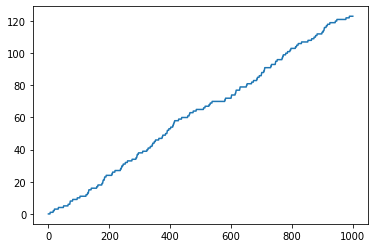

In [ ]:
s = [0]
for i in statics:
  s.append(s[-1]+i)
_, ax = plt.subplots()
ax.plot(list(range(k+1)),s) # 점점시행하면서 이제까지의 보상의 합.

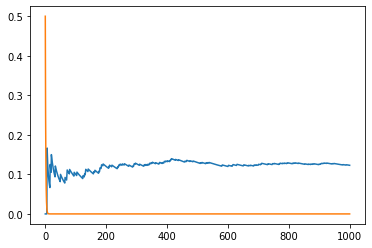

In [ ]:
import matplotlib.pyplot as plt

s = [0]
for i in range(k):
    s.append((s[-1]*i+statics[i])/(i+1))
_, ax = plt.subplots()
ax.plot(list(range(k+1)), s, list(range(k+1)), ecs) # 점점시행하면서 평균 기대값
# ax.plot(list(range(k+1)), s)

In [ ]:
# 현재 슬롯 머신 기대값
for i in range(len(machines)):
  print(machines[i].getStat())

0.10152284263959391
0.22527472527472528
0.32947976878612717
0.3924731182795699
0.5572519083969466


# 정리

How many slot machines : 5
Slot machine 1 probability : 0.1
Slot machine 2 probability : 0.2
Slot machine 3 probability : 0.3
Slot machine 4 probability : 0.4
Slot machine 5 probability : 0.5
Enter epsilon value : 0.5
How many times do you draw : 1000
1000번 시행후 총 보상값 : 108.0


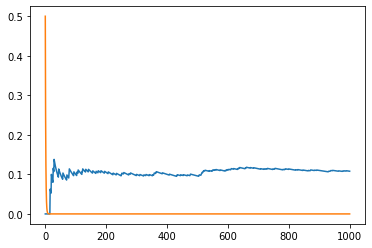

In [ ]:
import random

"""슬롯 머신 클래스를 생성합니다."""

class SlotMachine:
    def __init__(self, p):
        self.p = p
        self.reward = 0.0
        self.draws = 0
    
    def draw(self):
        self.draws += 1
        if random.uniform(0.0, 1.0) <= self.p:
            self.reward += 1.0
            return 1.0
        return 0.0
    # 현재까지의 평균 기대치
    def getStat(self):
        if self.draws == 0: return 0.0
        return self.reward/self.draws

"""실제 작업"""

n = int(input("How many slot machines : "))
machines = []
for i in range(n):
    p = float(input(f"Slot machine {i+1} probability : "))
    machines.append(SlotMachine(p))

e = float(input("Enter epsilon value : "))
k = int(input("How many times do you draw : "))

statics = []
ecs = [e]
ec = e
# k번 레버를 당기는 동안
for i in range(k):
    if random.uniform(0.0, 1.0) <= ec:
        choice = random.randrange(0, n)
    else:
        choice = 0
        maxv = machines[0].getStat()
        for m in range(1, n):
            v = machines[m].getStat()
            if v > maxv:
                choice = m
                maxv = v
    reward = machines[choice].draw()
    statics.append(reward)
    ec *= e
    ecs.append(ec)

print(f"{k}번 시행후 총 보상값 : {sum(statics)}")

"""그림 그리기"""

import matplotlib.pyplot as plt

s = [0]
for i in range(k):
    s.append((s[-1]*i+statics[i])/(i+1))
_, ax = plt.subplots()
ax.plot(list(range(k+1)), s, list(range(k+1)), ecs)


In [ ]:
# 현재 슬롯 머신 기대값
for i in range(len(machines)):
  print(machines[i].getStat())

0.10810810810810811
0.0
0.0
0.0
0.0


In [ ]:
import random


In [ ]:
random.randrange(1,3)

1

In [ ]:
turn = 1

In [ ]:
turn ^= 3

In [ ]:
turn

2

In [ ]:
random.choice([1, 2, 3])

1